<a href="https://colab.research.google.com/github/MykolaKud/python_for_ds_tasks/blob/main/hw_4_3_%D0%A0%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_%D0%B7_DataFrame_%D0%94%D1%96%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%B0_%D1%80%D0%BE%D0%B7%D1%81%D1%96%D1%8E%D0%B2%D0%B0%D0%BD%D0%BD%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому ДЗ ми потренуємось будувати візуалізації з використанням бібліотеки `maplotlib` для візуалізації даних в `pandas.DataFrame`.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Опис бізнес задачі та набору даних

Набір даних "Yulu" містить інформацію про попит на спільні електровелосипеди в Індії, що надаються провідним індійським постачальником мікромобільності Yulu. Ця компанія пропонує унікальні транспортні засоби для щоденних поїздок з метою усунення транспортних заторів в Індії та забезпечення безпечного, зручного та доступного рішення для пересування. Зони Yulu розташовані в оптимальних місцях, включаючи станції метро, автобусні зупинки, офісні простори, житлові райони та корпоративні офіси, щоб полегшити поїздки на перші та останні кілометри.

Останнім часом Yulu зіткнулася зі значними зниженнями доходів, тому компанія звернулася до консалтингової фірми з метою зрозуміти, від яких факторів залежить попит на ці спільні електровелосипеди, особливо на індійському ринку.

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів


0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`


In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
%matplotlib inline

1. Завантажте дані з файла `yulu_rental.csv` у pandas.DataFrame `df`.

In [6]:
import pandas as pd
data_path = 'drive/MyDrive/data_csv/yulu_rental.csv'
df = pd.read_csv(data_path)

2. Виведіть

- перші 3 записи з набору даних
- типи даних в наборі даних
- розміри набору даних

In [44]:
#перші 3 записи з набору даних

df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01


In [7]:
#типи даних в наборі даних
df.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [11]:
#розміри набору даних
df.shape

(10886, 12)

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.
Наша колонка тепер стане таймпстемпом і для неї став доступний функціонал, описаний тут

https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html

Наприклад, ми можемо легко виокремити дату, день тижня, чи це робочий день, чи ні.

In [9]:
df['datetime'] = pd.to_datetime(df.datetime)

3. З допомогою matplotlib побудуйте найпростіший лінійний графік кількості зареєстрованих користувачів (`registered`) на кожну годину.

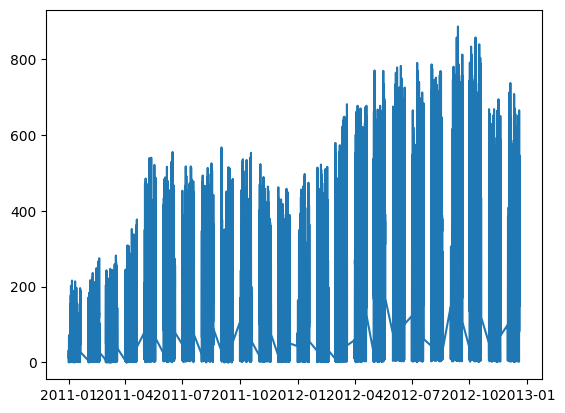

In [10]:
x = df.datetime
y = df.registered
plt.plot(x, y)

plt.show();

Має вийти щось таке:
![](https://drive.google.com/uc?export=view&id=1WX6s9qmiwq_1TSHQtRX0bPL8sT6Gw2BH)

4. Графік виглядає так собі, правда? Давайте загрегуємо дані по дням. Для цього запустіть наступний код аби створити колонку "дата" (без часу) і після цього напишіть самостійно код, аби загрегувати дані і отримати кількість зарестрованих клієнтів на день. Ваша фінальна структура (запишіть її в змінну `df_registered_by_date`) даних має містити дві колонки: дату і кількість зареєстрованих користувачів на цей день.

In [11]:
df['date'] = df.datetime.dt.date

In [16]:
grouped_date = df.groupby('date').registered.sum()
df_registered_by_date = grouped_date.reset_index(name='registered')

In [24]:
df_registered_by_date

,date,registered
0,2011-01-01,654
1,2011-01-02,670
2,2011-01-03,1229
3,2011-01-04,1454
4,2011-01-05,1518
...,...,...
451,2012-12-15,4280
452,2012-12-16,3248
453,2012-12-17,4373
454,2012-12-18,5124


5. Тепер побудуйте лінійний графік з matplotlib для даних в `df_registered_by_date`.

  Додайте наступну частину до графіку аби зробити підписи за віссю ОХ більш читаємими

  `plt.xticks(rotation=45, ha='right')`

  Після побудови графіку проаналізуйте його та напишіть, які тенденції щодо зміни кількості зареєстрованих користувачів в часі ви бачите і чому так може бути?

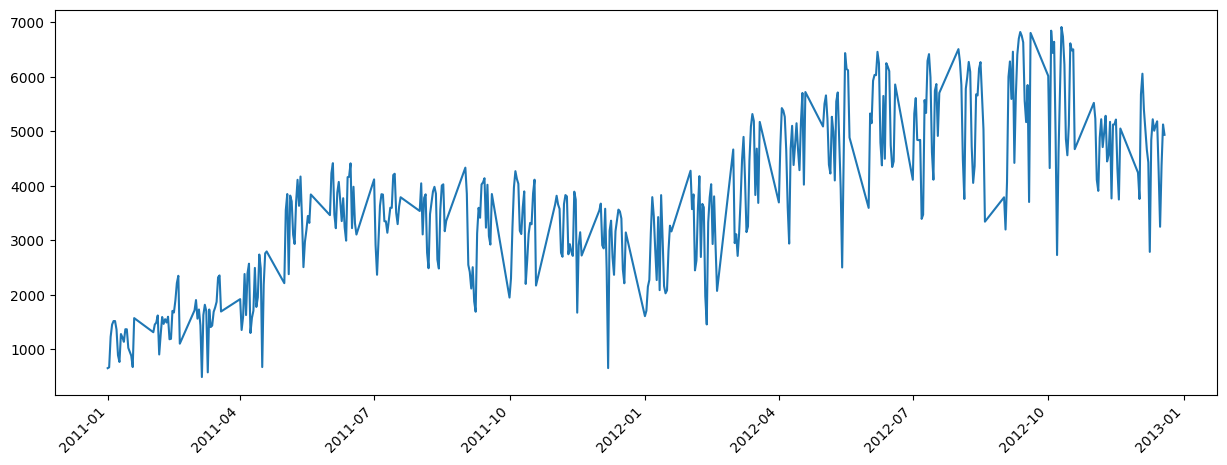

In [22]:
x_date = df_registered_by_date['date']
y_reg_quantity = df_registered_by_date.registered

plt.figure(figsize=(15,5))

plt.plot(x_date, y_reg_quantity)

plt.xticks(rotation=45, ha='right')

plt.show();

***ВИСНОВОК: Згідно цього графіку можна зробити висновок що у вихідні дні, як правило, кількість реєстрацій зменшується (це видно по різких обривах лінії графіку), скоріше за все, це пов'язано з тим, що більшість людей на роботу їздить в робочі дні. Також варто зазначити, що глобальне зростання кількості реєстрації відбувається саме з початком весни і, відповідно, більш сприятливої погоди для їзди на велосипеді***

6. Побудуйте графік розсіювання (scatterplot) між температурою і тим, як вона відчувається (atemp). Поставте прозорість точок 0.2. Додайте підписи до осей Х ат У. Опишіть свої спостереження з цього графіку. Які висновки можна зробити? Що дивного бачите?

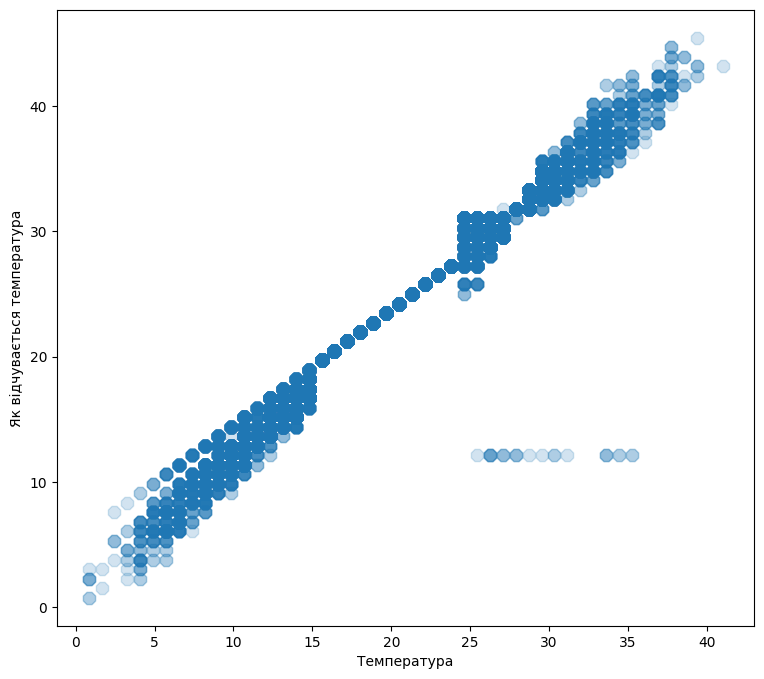

In [40]:
x_temp = df.temp
y_atemp = df.atemp

plt.figure(figsize=(9,8))
plt.scatter(x_temp, y_atemp, s=90, alpha=0.2, marker='8')
plt.xlabel('Температура')
plt.ylabel('Як відчувається температура')

plt.show()

  Очікуваний графік:
![](https://drive.google.com/uc?export=view&id=13Mi6AGPUh5aQ5YEZjrlkQPuFcNzeeppB)


***ВИСНОВОК: В більш прохолодну і більш спекотну погоду є різниця у відчутті температури в різні дні, це може бути пов'язано з вологістю повітря, або з атмосферними явищами (наприклад вітер). Що дивно, що є такий час, коли висока температура (25-30 градусів) відчувається низькою. Можемо первірити, зробивши фільтрацію даних в таблиці***

In [52]:
df_filtered = df[(df['temp'] < 36) & (df['temp'] > 24 ) & (df['atemp'] < 15)]
df_filtered

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
8991,2012-08-17 00:00:00,3,0,1,1,27.88,12.12,57,11.0014,21,67,88,2012-08-17
8992,2012-08-17 01:00:00,3,0,1,1,27.06,12.12,65,7.0015,16,38,54,2012-08-17
8993,2012-08-17 02:00:00,3,0,1,1,27.06,12.12,61,8.9981,4,15,19,2012-08-17
8994,2012-08-17 03:00:00,3,0,1,1,26.24,12.12,65,7.0015,0,6,6,2012-08-17
8995,2012-08-17 04:00:00,3,0,1,1,26.24,12.12,73,11.0014,0,9,9,2012-08-17
8996,2012-08-17 05:00:00,3,0,1,1,26.24,12.12,73,7.0015,2,34,36,2012-08-17
8997,2012-08-17 06:00:00,3,0,1,1,25.42,12.12,78,8.9981,6,151,157,2012-08-17
8998,2012-08-17 07:00:00,3,0,1,1,26.24,12.12,73,7.0015,11,368,379,2012-08-17
8999,2012-08-17 08:00:00,3,0,1,1,27.88,12.12,65,8.9981,43,625,668,2012-08-17
9000,2012-08-17 09:00:00,3,0,1,1,28.70,12.12,58,7.0015,58,320,378,2012-08-17


***Схоже що 17-08-2012 відбувся збій у визначенні температури за відчуттями, або внесені помилкові дані***